# Proyek Analisis Data: E-Commerce Public Dataset

## Menentukan Pertanyaan Bisnis

1. Bagaimana persentase tingkat kepuasan pelanggan selama berbelanja?
2. Kategori produk manakah yang memiliki penjualan paling banyak dan paling sedikit?
3. Kategori produk manakah yang memiliki revenue paling banyak dan paling sedikit?
4. Kapan terakhir kali pelanggan melakukan transaksi?
5. Seberapa sering pelanggan melakukan transaksi?
6. Berapa banyak uang yang dikeluarkan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Memuat dataset order items
order_items_df = pd.read_csv('data\order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [3]:
#Memuat dataset order review
order_reviews_df = pd.read_csv('data\order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [4]:
#Memuat dataset order payments
order_payments_df = pd.read_csv('data\order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
#Memuat dataset products
products_df = pd.read_csv('data\products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
#Memuat dataset translasi kategori produk
category_translation_df = pd.read_csv('data\product_category_name_translation.csv')
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
#Memuat dataset order
orders_df = pd.read_csv('data\orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

#### Order Items Dataframe

In [8]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat kesalahan tipe data pada 'shipping_limit_date' yang seharusnya *datetime*

In [9]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [10]:
#Memeriksa missing value
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak ada missing value pada order_items_df

In [11]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Order Reviews Dataframe

In [13]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


terdapat kesalahan tipe data pada kolom 'review_creation_date' dan 'review_answer_timestamp' yang seharusnya diubah menjadi datetime

In [14]:
#Mencari missing value
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat banyak missing value pada kolom 'review_comment_title' dan 'review_comment_message'. Karena tidak relevan dengan pertanyaan bisnis, maka kita dapat menghapus kolomnya.

In [15]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Terdapat 99.224 jumlah review dengan rata-rata tingkat kepuasan 4,086421

#### Order Payments Dataframe

In [17]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
order_payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [19]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Tidak ada missing value pada order_payment_df

In [20]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Orders Dataframe

In [22]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date yang perlu diubah menjadi datetime

In [23]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [24]:
#Mengecek missing value
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat beberapa missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.

In [25]:
#Mengecek duplikasi
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Products Dataframe

In [27]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
products_df.nunique(axis=0)

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [29]:
#Mengecek missing value
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat beberapa missing value pada semua kolom kecuali product_id

In [30]:
#Mengecek duplikasi
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [31]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Cleaning Data

#### Order Items Dataframe

In [32]:
#Mengubah tipe data kolom 'shipping_limit_date' menjadi datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

In [33]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Order Reviews Dataframe

In [34]:
#Menghapus kolom 'review_comment_title' dan 'review_comment_message'
order_reviews_df = order_reviews_df.drop(['review_comment_title', 'review_comment_message'], axis=1)

In [35]:
#Mengubah tipe data kolom 'review_creation_date' dan 'review_answer_timestamp' menjadi datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'], format='%Y-%m-%d %H:%M:%S')
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'], format='%Y-%m-%d %H:%M:%S')

In [36]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


#### Order Payments Dataframe

Tidak ada yang perlu diperbaiki

#### Orders Dataframe

In [37]:
#Mengubah tipe data kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date menjadi datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

Dikarenakan jumlah data yang memiliki missing value relatif rendah (<2%), maka hapus entri data yang memiliki missing value.

In [38]:
#Menghapus entri yang memiliki missing value
orders_df = orders_df.dropna()

In [39]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [40]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### Products Dataframe

In [41]:
#Menggabungkan products_df dengan category_translation_df untuk mengganti bahasanya menjadi inggris
products_df = products_df.merge(category_translation_df, on='product_category_name', how='outer')

In [42]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


Dikarenakan jumlah data yang memiliki missing value relatif rendah (<2%), maka hapus entri data yang memiliki missing value.

In [43]:
#Mengganti nilai null pada kolom 'product_category_name' dan product_category_name_english dengan 'uncategorized'
products_df['product_category_name'] = products_df['product_category_name'].fillna('uncategorized')
products_df['product_category_name_english'] = products_df['product_category_name_english'].fillna('uncategorized')

In [44]:
products_df.isna().sum()

product_id                         0
product_category_name              0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english      0
dtype: int64

Masih terdapat missing value pada beberapa kolom. Namun dikarenakan tidak relevan dengan pertanyaan bisnis, dapat diabaikan saja.

## Exploratory Data Analysis (EDA)

### Explore Order Items Dataframe

Berdasarkan pada keterangan dataset di kaggle, untuk mendapatkan jumlah harga setiap pemesanan, perlu dikalikan kolom 'order_item_id' dengan kolom 'price'. Begitupun juga untuk mendapatkan total harga ongkos kirim, perlu dikalikan kolom 'order_items_id' dengan 'freight_value'.

In [45]:
#Mendapatkan jumlah harga untuk setiap pemesanan
order_items_df['total_price'] = order_items_df['order_item_id'] * order_items_df['price']

#Mendapatkan jumlah ongkir untuk setiap pemesanan
order_items_df['total_freight_value'] = order_items_df['order_item_id'] * order_items_df['freight_value']

Menjumlahkan kolom 'total_price' dengan 'total_freight_value' untuk mendapatkan total biaya yang harus dibayarkan:

In [46]:
#Mendapatkan jumlah harga yang harus dibayarkan untuk setiap pemesanan
order_items_df['total_order_value'] = order_items_df['total_price'] + order_items_df['total_freight_value']

In [47]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,total_freight_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,218.04


### Explore Order Review Dataframe

In [48]:
order_reviews_df.describe(include='all', datetime_is_numeric=True)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224
unique,98410,98673,NaN,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,NaN,NaN
freq,3,3,NaN,NaN,NaN
mean,NaN,NaN,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35


In [49]:
#Mengetahui jumlah review untuk setiap skor
order_reviews_df.groupby('review_score').agg({
  'review_id':'count'
  })

,review_id
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


In [50]:
#Mengetahui persentase review untuk setiap skor
review_percentage = order_reviews_df['review_score'].value_counts(normalize=True).round(3) * 100
review_percentage

5    57.8
4    19.3
1    11.5
3     8.2
2     3.2
Name: review_score, dtype: float64

Terlihat review dengan skor 5 memiliki persentase terbanyak, yakni 57.8%. Disusul oleh skor 4 dengan persentase 19.3%. Kemudian Skor 1 dengan persentase 11.5%. Skor 3 dengan persentase 8.2%. Dan yang terakhir skor 2 dengan persentase 3.2%.

### Explore Korelasi Antar Dataframe

Untuk menjawab pertanyaan ke-2,3,4, 5, dan 6 perlu dilakukan penggabungan semua dataframe untuk membantu memahami hubungan dan pola antar dataframe.

In [51]:
all_df = orders_df.copy()

In [52]:
all_df = pd.merge(all_df, order_items_df, on='order_id')

In [53]:
all_df = pd.merge(all_df, order_payments_df, on='order_id')

In [54]:
all_df = pd.merge(all_df, order_reviews_df, on='order_id')

In [55]:
all_df = pd.merge(all_df, products_df, on='product_id')

In [56]:
#Melihat hasil penggabungan data
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,...,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,...,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [58]:
#Mengetahui kategori produk mana yang memiliki penjualan paling banyak dan paling sedikit
all_df.groupby('product_category_name_english').agg({
  'order_id' : 'count'
  }).sort_values(by='order_id', ascending=False)

,order_id
product_category_name_english,
bed_bath_table,11684
health_beauty,9749
sports_leisure,8734
furniture_decor,8554
computers_accessories,7926
...,...
arts_and_craftmanship,24
la_cuisine,15
cds_dvds_musicals,14


Berdasarkan tabel di atas, kategori produk 'bed_bath_table' memiliki penjualan terbanyak. Sedangkan kategori produk 'security_and_services' memiliki penjualan paling sedikit.

In [59]:
#Mengetahui kategori produk mana yang memiliki revenue paling banyak dan paling sedikit
all_df.groupby('product_category_name_english').agg({
  'payment_value' : 'sum'
  }).sort_values(by='payment_value', ascending=False)

,payment_value
product_category_name_english,
bed_bath_table,1706872.26
health_beauty,1612019.96
computers_accessories,1557592.86
furniture_decor,1391435.19
watches_gifts,1380171.71
...,...
flowers,1922.77
home_comfort_2,1458.54
cds_dvds_musicals,1199.43


Berdasarkan tabel di atas, kategori produk 'bed_bath_table' memiliki revenue terbanyak dan kategori produk 'security_and_services' memiliki revenue yang paling sedikit juga

### RFM Analysis

Untuk menjawab 3 pertanyaan terakhir, perlu dilakukan RFM Analysis.

RFM Analysis adalah teknik yang digunakan dalam analisis perilaku pelanggan dan segmentasi pelanggan. RFM singkatan dari Recency, Frequency, dan Monetary.

 - *Recency*: Mengukur berapa lama sejak pelanggan terakhir kali melakukan pembelian.

- *Frequency*: Menghitung seberapa sering pelanggan melakukan pembelian dalam periode tertentu.

- *Monetary*: Menilai berapa banyak uang yang telah dihabiskan pelanggan.

In [60]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114842 entries, 0 to 114841
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114842 non-null  object        
 1   customer_id                    114842 non-null  object        
 2   order_status                   114842 non-null  object        
 3   order_purchase_timestamp       114842 non-null  datetime64[ns]
 4   order_approved_at              114842 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114842 non-null  datetime64[ns]
 6   order_delivered_customer_date  114842 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114842 non-null  datetime64[ns]
 8   order_item_id                  114842 non-null  int64         
 9   product_id                     114842 non-null  object        
 10  seller_id                      114842 non-null  object        
 11  

In [61]:
#Mengetahui pesanan yang terakhir dilakukan untuk setiap pelanggan
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
  "order_purchase_timestamp" : "max",
  "order_id" : "count",
  "payment_value" : "sum"
  })

#Mengganti nama kolom
rfm_df.columns = ['customer_id', 'last_purchase', 'frequency', 'monetary']

#Menghitung kapan terakhir pelanggan melakukan transaksi (hari)
#Mengekstrak tanggal dari kolom 'last_purchase'
rfm_df['last_purchase'] = rfm_df['last_purchase'].dt.date

#Menggunakan tanggal pemesanan terakhir untuk menghitung recency
recent_date = all_df['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['last_purchase'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('last_purchase', axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288
1,000161a058600d5901f007fab4c27140,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378
4,000379cdec625522490c315e70c7a9fb,1,107.01,149


In [62]:
rfm_df.describe()

,frequency,monetary,recency
count,95814.000000,95814.000000,95814.000000
mean,1.198593,205.267609,239.485326
std,0.747088,608.553365,152.849035
min,1.000000,9.590000,0.000000
25%,1.000000,62.780000,115.000000
50%,1.000000,109.920000,220.000000
75%,1.000000,195.910000,349.000000
max,63.000000,109312.640000,695.000000


## Visualization & Explanatory Analysis

### 1. Bagaimana persentase tingkat kepuasan pelanggan selama berbelanja?

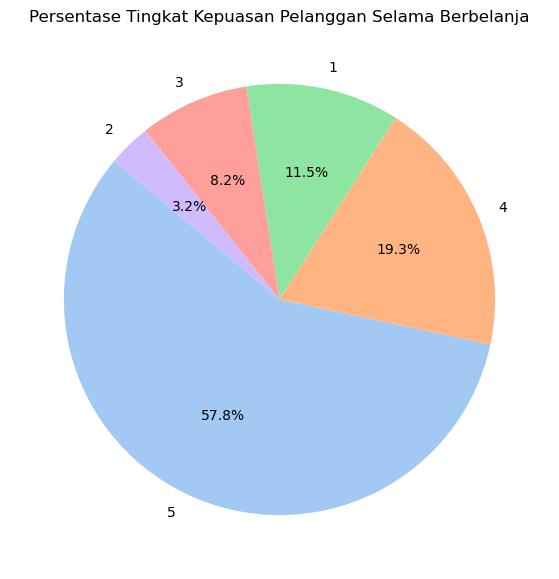

In [63]:
reviewscore = order_reviews_df['review_score'].value_counts()

#Plotting pie chart
plt.figure(figsize=(10, 7))
plt.pie(reviewscore, labels=reviewscore.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Persentase Tingkat Kepuasan Pelanggan Selama Berbelanja')
plt.show()

Mayoritas pelanggan puas dengan pengalaman mereka selama berbelanja, namun terdapat persentase yang signifikan (11.5%) yang tidak puas.

### 2. Kategori produk manakah yang memiliki penjualan paling banyak dan paling sedikit?

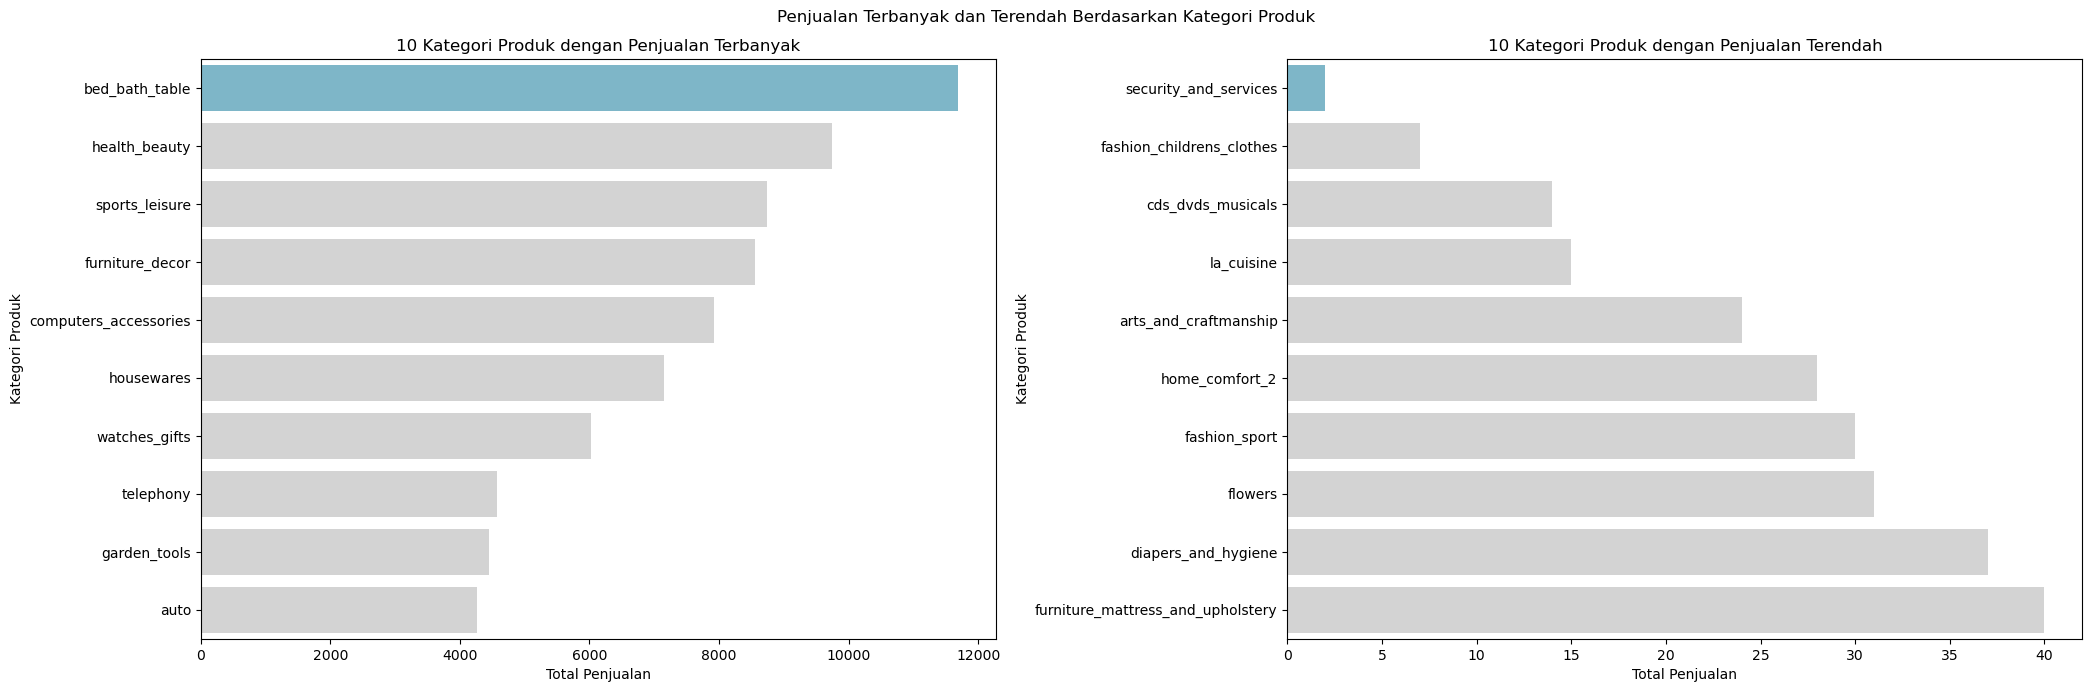

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

#Jumlah penjualan terbanyak
top_order = all_df.groupby('product_category_name_english').order_id.count().reset_index()
top_order.rename(columns={
  'order_id' : 'total_order'
  }, inplace=True)

top_order

#Plotting bar chart
sns.barplot(x='total_order', y='product_category_name_english', data=top_order.nlargest(10, 'total_order'), ax=ax[0], palette=colors_)
ax[0].set_title('10 Kategori Produk dengan Penjualan Terbanyak')
ax[0].set_xlabel('Total Penjualan')
ax[0].set_ylabel('Kategori Produk')

#Jumlah penjualan terendah
bottom_order = all_df.groupby('product_category_name_english').order_id.count().reset_index()
bottom_order.rename(columns={
  'order_id' : 'total_order'
  }, inplace=True)

bottom_order

#Plotting bar chart
sns.barplot(x='total_order', y='product_category_name_english', data=bottom_order.nsmallest(10, 'total_order'), ax=ax[1], palette=colors_)
ax[1].set_title('10 Kategori Produk dengan Penjualan Terendah')
ax[1].set_xlabel('Total Penjualan')
ax[1].set_ylabel('Kategori Produk')

plt.suptitle("Penjualan Terbanyak dan Terendah Berdasarkan Kategori Produk")
plt.tight_layout(pad=1)
plt.show()

Terlihat kategori produk 'bed_bath_table' memiliki penjualan tertinggi, sedangkan kategori produk 'security_and_services' memiliki penjualan terendah.

### 3. Kategori produk manakah yang memiliki revenue paling banyak dan paling sedikit?

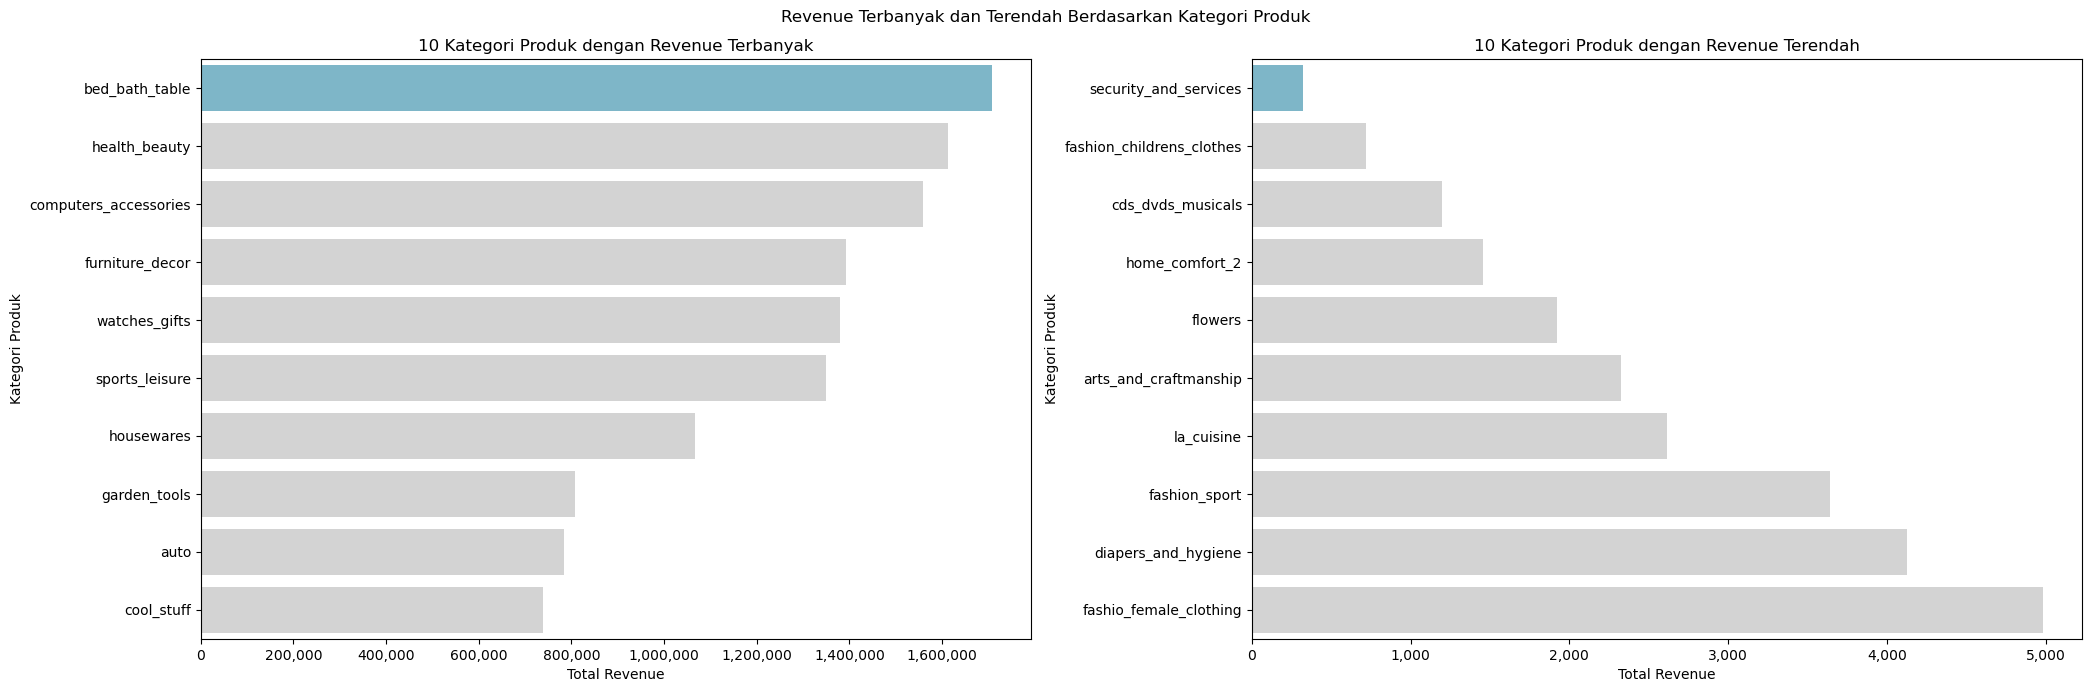

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Format sumbu-x ke skala normal
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax[0].xaxis.set_major_formatter(tick)

#Jumlah revenue terbanyak
top_revenue = all_df.groupby('product_category_name_english').payment_value.sum().reset_index()
top_revenue.rename(columns={
  'payment_value' : 'revenue'
  }, inplace=True)

#Plotting bar chart
sns.barplot(x='revenue', y='product_category_name_english', data=top_revenue.nlargest(10, 'revenue'), ax=ax[0], palette=colors_)
ax[0].set_title('10 Kategori Produk dengan Revenue Terbanyak')
ax[0].set_xlabel('Total Revenue')
ax[0].set_ylabel('Kategori Produk')

#Jumlah penjualan terendah
bottom_revenue = all_df.groupby('product_category_name_english').payment_value.sum().reset_index()
bottom_revenue.rename(columns={
  'payment_value' : 'revenue'
  }, inplace=True)

#Plotting bar chart
sns.barplot(x='revenue', y='product_category_name_english', data=bottom_revenue.nsmallest(10, 'revenue'), ax=ax[1], palette=colors_)
ax[1].set_title('10 Kategori Produk dengan Revenue Terendah')
ax[1].set_xlabel('Total Revenue')
ax[1].set_ylabel('Kategori Produk')

# Format sumbu-x ke skala normal
ax[1].xaxis.set_major_formatter(tick)

plt.suptitle("Revenue Terbanyak dan Terendah Berdasarkan Kategori Produk")
plt.tight_layout(pad=1)
plt.show()

### 4. Kapan terakhir kali pelanggan melakukan transaksi?

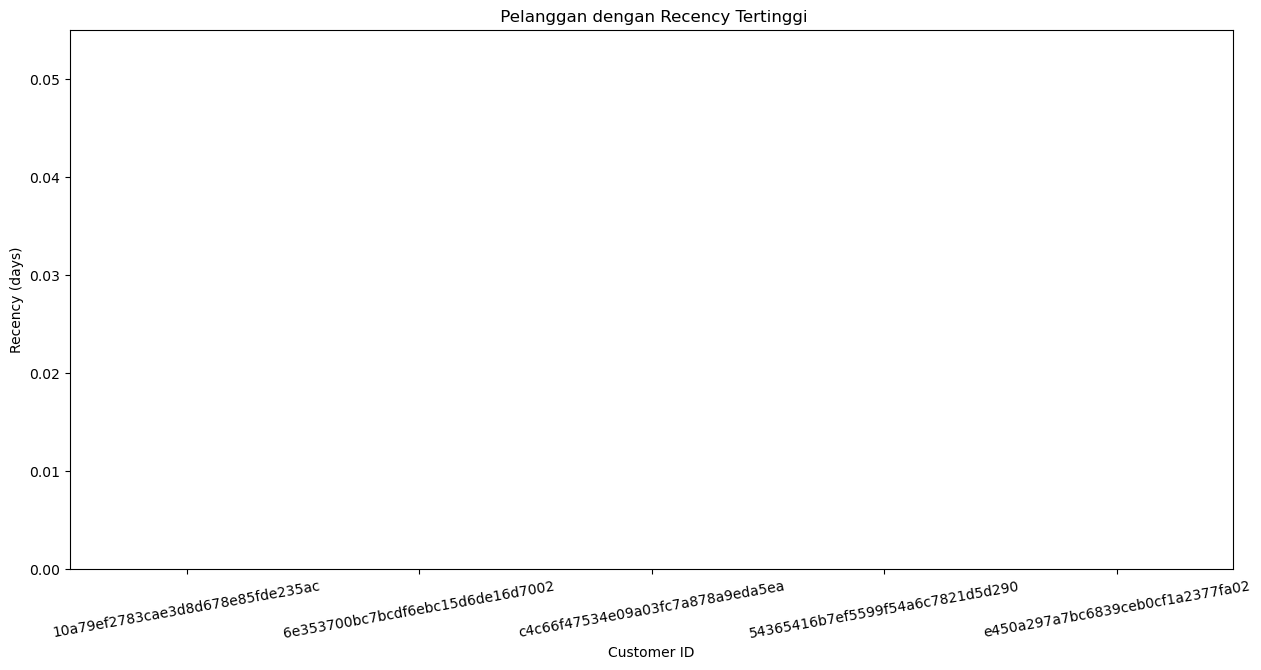

In [66]:
# Mengatur size grafik
plt.figure(figsize=(15, 7))

# Mendefinisikan warna
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y='recency', x='customer_id', data=rfm_df.sort_values(by='recency', ascending=True).head(5), palette=colors)
plt.title(' Pelanggan dengan Recency Tertinggi')

plt.xticks(rotation=10)
plt.xlabel('Customer ID')

plt.ylabel('Recency (days)')

# Atur batas sumbu-y
plt.ylim(0)

plt.show()

### 5. Seberapa sering pelanggan melakukan transaksi?

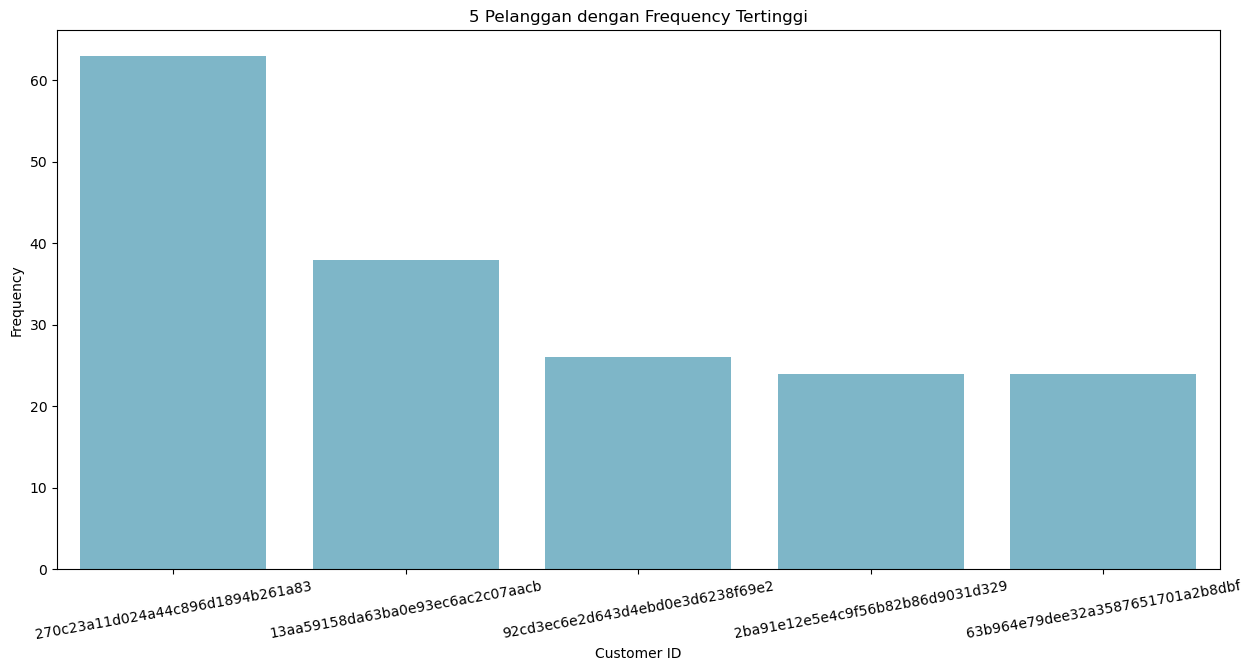

In [67]:
#Mengatur size grafik
plt.figure(figsize=(15, 7))

#Mendefinisikan warna
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y='frequency', x='customer_id', data=rfm_df.nlargest(5, 'frequency'), palette=colors)
plt.title('5 Pelanggan dengan Frequency Tertinggi')

plt.xticks(rotation=10)
plt.xlabel('Customer ID')

plt.ylabel('Frequency')

plt.show()

### 6. Berapa banyak uang yang dikeluarkan pelanggan?

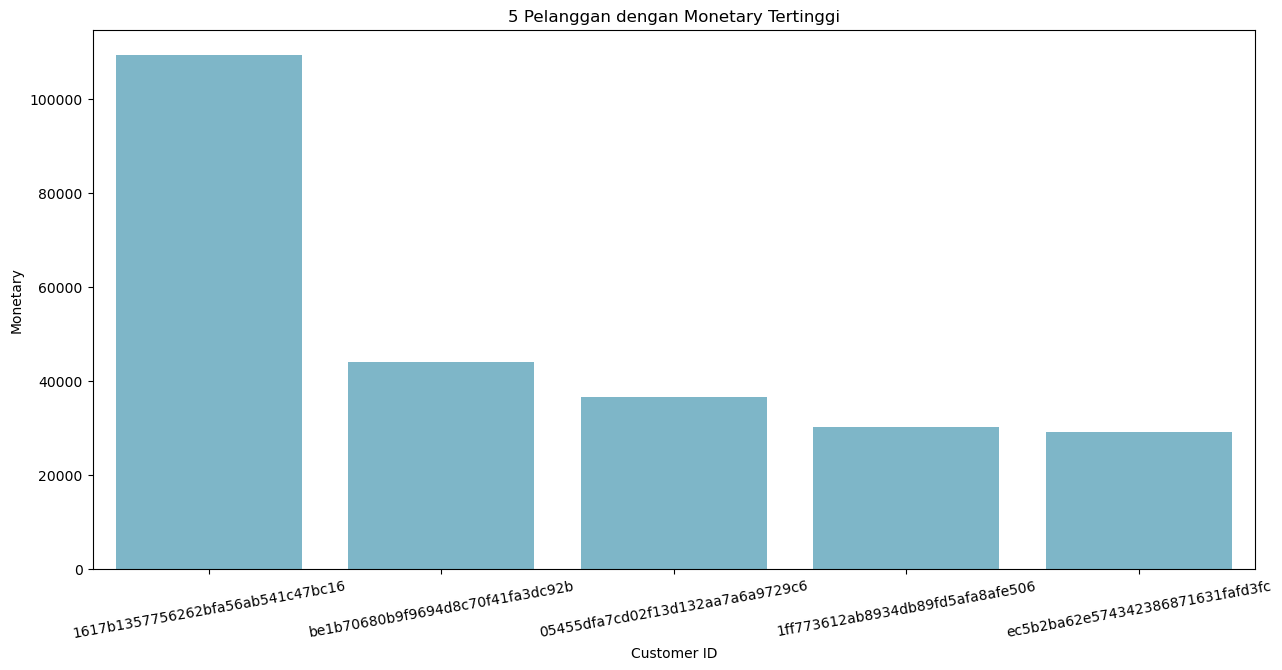

In [68]:
#Mengatur size grafik
plt.figure(figsize=(15, 7))

#Mendefinisikan warna
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y='monetary', x='customer_id', data=rfm_df.nlargest(5, 'monetary'), palette=colors)
plt.title('5 Pelanggan dengan Monetary Tertinggi')

plt.xticks(rotation=10)
plt.xlabel('Customer ID')

plt.ylabel('Monetary')

plt.show()

In [70]:
#Save all_df to csv
all_df.to_csv('all_df.csv', index=False)

## Conclusion

- Konklusi Pertanyaan 1: <br>Review dengan skor 5 memiliki persentase terbanyak, yakni 57.8%. Disusul oleh skor 4 dengan persentase 19.3%. Kemudian Skor 1 dengan persentase 11.5%. Skor 3 dengan persentase 8.2%. Dan yang terakhir skor 2 dengan persentase 3.2%.

- Konklusi Pertanyaan 2: <br>Kategori produk yang memiliki penjualan tertinggi adalah 'bed_bath_table' dengan jumlah 11684 penjualan. Sedangkan kategori produk yang memiliki penjualan terendah adalah 'security_and_servies' dengan jumlah 2 penjualan.

- Konklusi Pertanyaan 3: <br> Kategori produk 'bed_bath_table' memiliki revenue tertinggi (1706872.26 Real Brasil), sedangkan kategori produk 'security_and_services' memiliki revenue terendah (324.51 Real Brasil).

- Konklusi Pertanyaan 4:<br> Terdapat 11 pelanggan yang melakukan transaksi tepat pada hari ketika data ini dikumpulkan (0 hari).

- Konklusi Pertanyaan 5: <br>Dalam daftar 10 pelanggan yang paling sering bertransaksi, setiap pelanggan telah melakukan minimal 22 transaksi. Pelanggan yang paling aktif bahkan telah melakukan 63 transaksi. Rata-rata, pelanggan masih melakukan transaksi sekali (1.198593).

- Konklusi Pertanyaan 6: <br> Pelanggan  dengan monetary tertinggi memiliki pengeluaran sebanyak 109312.64 Real Brasil. Kemudian pelanggan dengan monetary terendah mengerluarkan sebanyak 9.59 Real Brasil. Rata-rata, setiap pelanggan mengeluarkan uang sebanyak 205.27 Real Brasil.